## Tarefa do modulo 4 - Trabalhando com Bancos de Dados


Todos os exercícios são focados no SQL!


Obs.: Todos os códigos são correspondentes aos códigos vistos em aula!

# Exercícios:



**1. A) Criar uma tabela chamada dados_cadastrais onde cada linha representa um funcionário contendo os seguintes atributos: Id, nome, sobrenome, data_nasci, cpf e endereco.**


**1. B) criar uma tabela chamada dados_profissionais contendo os seguintes atributos: id, graduacao, cargo, salario e tempo_casa.**


**Insira 4 registros em cada uma das tabelas!**

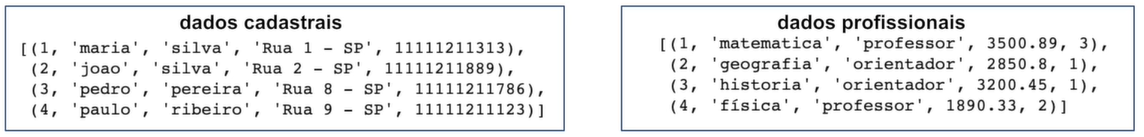

Obs.: Como a data de nascimento não foi informada nos dados do exercício, você pode inserir uma data fictícia a sua escolha ou ainda atribuir o valor 0.

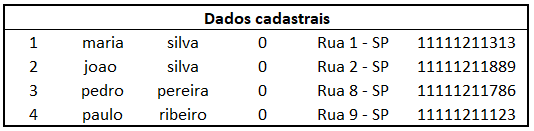
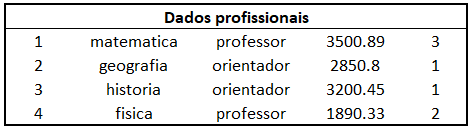

In [1]:
# importanto o sqlite3
import sqlite3

# Criando/conectando ao banco de dados:

conn = sqlite3.connect("modulo4.db") 
cursor = conn.cursor() 

In [2]:
# Criar tabela 1:

cursor.execute("CREATE TABLE dados_cadastrais (Id integer, nome text, sobrenome text, data_nasci integer, cpf inteiro, endereco text)");


# Criar tabela 2:
cursor.execute("CREATE TABLE dados_profissionais (Id integer, graduacao text, cargo text, salario float, tempo_casa inteiro)");

In [3]:
# Inserir dados na tabela 1:

cursor.execute("INSERT INTO dados_cadastrais VALUES(1, 'maria', 'silva', 0, 11111211313, 'rua 1 - SP')") 
cursor.execute("INSERT INTO dados_cadastrais VALUES(2, 'joao', 'silva', 0, 11111211889, 'rua 2 - SP')")
cursor.execute("INSERT INTO dados_cadastrais VALUES(3, 'pedro', 'pereira', 0, 11111211786, 'rua 8 - SP')")
cursor.execute("INSERT INTO dados_cadastrais VALUES(4, 'paulo', 'ribeiro', 0, 11111211123, 'rua 9 - SP')")
conn.commit()

In [4]:
# Visualizando a tabela 1:

cursor.execute("SELECT * FROM dados_cadastrais")
cursor.fetchall()

[(1, 'maria', 'silva', 0, 11111211313, 'rua 1 - SP'),
 (2, 'joao', 'silva', 0, 11111211889, 'rua 2 - SP'),
 (3, 'pedro', 'pereira', 0, 11111211786, 'rua 8 - SP'),
 (4, 'paulo', 'ribeiro', 0, 11111211123, 'rua 9 - SP')]

In [5]:
# Inserir dados na tabela 2:

cursor.execute("INSERT INTO dados_profissionais VALUES(1, 'matematica', 'professor', 3500.89, 3)") 
cursor.execute("INSERT INTO dados_profissionais VALUES(2, 'geografia', 'orientador', 2850.80, 1)") 
cursor.execute("INSERT INTO dados_profissionais VALUES(3, 'historia', 'orientador', 3200.45, 1)") 
cursor.execute("INSERT INTO dados_profissionais VALUES(4, 'fisica', 'professor', 1890.33, 2)") 

In [6]:
# Visualizando a tabela 2:

cursor.execute("SELECT * FROM dados_profissionais")
cursor.fetchall()

[(1, 'matematica', 'professor', 3500.89, 3),
 (2, 'geografia', 'orientador', 2850.8, 1),
 (3, 'historia', 'orientador', 3200.45, 1),
 (4, 'fisica', 'professor', 1890.33, 2)]

**2. Usando a tabela dados_profissionais, escreva uma query que retorne todos os campos da tabela ordenando-os pela coluna tempo_casa de maneira decrescente.**

In [7]:
cursor.execute("SELECT * FROM dados_profissionais ORDER BY tempo_casa DESC")
cursor.fetchall()

[(1, 'matematica', 'professor', 3500.89, 3),
 (4, 'fisica', 'professor', 1890.33, 2),
 (2, 'geografia', 'orientador', 2850.8, 1),
 (3, 'historia', 'orientador', 3200.45, 1)]

3. Conte a quantidade de funcionarios dessa empresa

In [8]:
# Dica: para contar usamos o COUNT(atributo)

cursor.execute("SELECT count(1) FROM dados_profissionais ORDER BY tempo_casa DESC")
cursor.fetchall()

[(4,)]

**4. Usando a tabela dados_cadastrais, escreva uma query que liste apenas os funcionarios que possuem sobrenome "silva" ordenados pelo nome completo, ou seja, nome e sobrenome.**

In [9]:
# Dica: combine o WHERE com o ORDER BY

cursor.execute("SELECT * FROM dados_cadastrais WHERE sobrenome = 'silva' ORDER BY nome, sobrenome")
cursor.fetchall()

[(2, 'joao', 'silva', 0, 11111211889, 'rua 2 - SP'),
 (1, 'maria', 'silva', 0, 11111211313, 'rua 1 - SP')]

**5. Escreva uma query que liste o valor da folha de pagamento dessa empresa por cargo usando a tabela dados_profissionais, ou seja, somar os salarios em cada cargo.**

In [10]:
# Dica: combine o SUM(atributo) com o GROUP BY

cursor.execute("SELECT cargo, SUM(salario) FROM dados_profissionais GROUP BY cargo")
cursor.fetchall()

[('orientador', 6051.25), ('professor', 5391.219999999999)]